In [4]:
import cv2 
from PIL import Image 
import numpy as np 

import matplotlib.pyplot as plt

In [5]:
img = cv2.imread("/Users/pawan/Downloads/leaf.jpg")

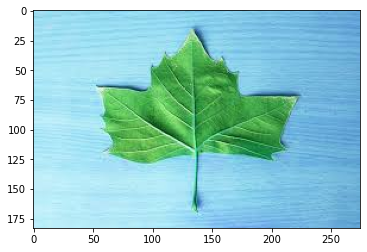

In [8]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [16]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [13]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

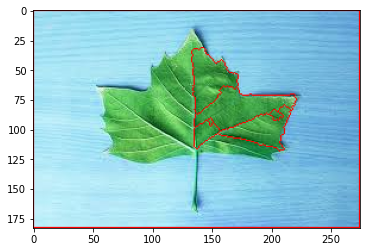

In [14]:
plt.imshow(img)

In [21]:
img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [169, 232, 252],
        [169, 230, 250],
        ...,
        [ 99, 165, 216],
        [ 99, 165, 216],
        [255,   0,   0]],

       [[255,   0,   0],
        [152, 215, 235],
        [154, 217, 237],
        ...,
        [106, 172, 223],
        [106, 172, 223],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [192, 238, 255],
        [192, 239, 253],
        ...,
        [103, 169, 218],
        [103, 169, 218],
        [255,   0,   0]],

       [[255,   0,   0],
        [190, 236, 253],
        [190, 237, 251],
        ...,
        [ 99, 165, 214],
        [ 99, 165, 214],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [22]:
img.shape

(183, 275, 3)